In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

#read csv, change hardcoded string if on a different computer and using the same data!!!
df = pd.read_csv("/Users/JDP/Desktop/datasets/python_practice_notebook/CES3resultsmainSD copy.csv")

#drop census, calling df will still have population data
df = df.drop(['Census Tract'], axis=1)


#ZIP code and onwards, population data and county dropped
dfZip = df.drop(['Total Population', 'California County'], axis = 1)

dfZip


,ZIP,City,Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,91901,Alpine,-116.647342,32.824487,11.66,16.65,16-20%,0.051,69.23,12.470000,...,3.45,29.9,44.68,8.7,44.97,12.0,21.22,24.33,2.52,13.02
1,91901,NaN,-116.764132,32.807883,7.65,7.68,6-10%,0.055,77.87,11.630000,...,0.00,8.4,4.63,5.2,14.15,9.2,10.07,17.48,1.81,5.89
2,91901,NaN,-116.781150,32.828797,11.00,15.17,16-20%,0.057,82.10,11.630000,...,6.69,29.1,43.26,6.9,28.15,21.9,66.51,30.38,3.15,20.57
3,91901,NaN,-116.751958,32.864704,17.93,32.95,31-35%,0.057,82.10,11.630000,...,5.85,24.5,35.44,9.9,55.30,25.8,78.76,36.68,3.80,29.70
4,91902,Bonita,-117.057880,32.656474,23.24,45.77,46-50%,0.040,25.87,11.210000,...,32.88,27.3,40.21,11.0,63.24,19.5,56.92,52.24,5.42,53.23
5,91902,NaN,-117.030954,32.671697,17.38,31.35,31-35%,0.040,25.87,11.630000,...,24.90,23.6,33.75,11.0,63.24,17.4,47.33,43.65,4.53,40.26
6,91902,NaN,-116.984940,32.683324,7.84,8.07,6-10%,0.040,25.87,12.470000,...,35.77,7.9,3.96,3.6,4.65,10.6,15.05,18.27,1.89,6.72
7,91902,NaN,-117.013015,32.660228,11.09,15.35,16-20%,0.040,25.87,11.630000,...,43.35,12.9,12.07,7.7,35.89,12.6,24.03,30.33,3.15,20.52
8,91902,NaN,-117.038703,32.649925,15.44,26.25,26-30%,0.040,25.87,11.630000,...,70.59,10.8,8.42,10.1,56.83,8.3,7.46,37.10,3.85,30.45
9,92003,Bonsall,-117.190446,33.285762,15.05,25.20,26-30%,0.046,53.02,8.697944,...,5.85,16.5,19.25,7.7,35.89,17.5,47.99,33.64,3.49,24.81


In [3]:
#cleaning data, refer back to here to get values back

#drop null values 
dfZip2 = dfZip.dropna()


#reindex to get rid of nonsense values and indexes
dfZip2 = dfZip2.reset_index(drop=True)

#clean data
dfCity = dfZip2.drop(['ZIP', 'Longitude', 'Latitude'], axis=1)

#data need further cleaning, find average of the groups, and reindex to fit in the table properly

#use groupCity to index quantitative measures as columns, recommended
groupCity = dfCity.groupby(['City']).mean().reset_index()

#use this to index columns integers 
transpose = groupCity.transpose()



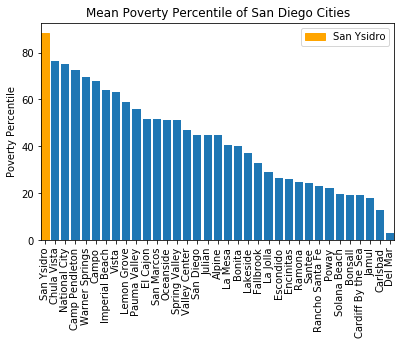

In [4]:
#general algorithm to sort columns, just change the column in by=('') to what you want to graph against cities:
#greatest to least: ascending = False, least to greatest: ascending = True

sortY = groupCity.sort_values(by=('Poverty Pctl'), ascending = False)

#graph down here 

#grab series object of cities column
citySeries = pd.Series(sortY.iloc[:,0])

cityList = citySeries.tolist()

ticks = []

#create custom ticks
for i in range(1, len(cityList) + 1):
    ticks.append(i)
    
x = np.array(ticks)

#can be set to horizontal, but vetical makes it cleaner
plt.xticks(x, cityList, rotation='vertical')


#change label for whatever you want to put in the legend, same with the column in sortY
barlist = plt.bar(x,sortY['Poverty Pctl'], label = 'San Ysidro')

#to change the color of a single bar, you will need to change the 0 to whatever index 
#the bar you want to change corresponds to in ticks, and the color keyword is just a single char
barlist[0].set_color('orange') 


plt.legend()

#plt.legend(handles=[barlist[0]], loc='best')
#colorPatch = mpatches.Patch(color='orange')
#plt.legend(handle=[colorPatch], label = barlist[0])




#adjust this variable according to how many xticks there are 
N = 35

#grab number of xticks and evenly distribute them according to a margin and # of ticks
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]


plt.gcf().subplots_adjust(left=margin, right=1.-margin)

plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])



#change to fit graph
plt.title("Mean Poverty Percentile of San Diego Cities")
plt.ylabel('Poverty Percentile')

plt.show()
